# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = mars.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_weather = []
# Loop through the scraped data to create a list of rows
for row in rows:
    data = row.find_all('td')
    id = data[0].text
    terrestrial_date = data[1].text
    sol = data[2].text
    ls = data[3].text
    month = data[4].text
    min_temp = data[5].text
    pressure = data[6].text
    
    #Create a list holding the data
    row_data = [id, terrestrial_date, sol, ls, month, min_temp, pressure]
    
    #append the list to mars_weather
    mars_weather.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
weather_data_df = pd.DataFrame(mars_weather, columns = columns)

In [8]:
# Confirm DataFrame was created successfully
weather_data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
weather_data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
weather_data_df['terrestrial_date'] = pd.to_datetime(weather_data_df['terrestrial_date'])
weather_data_df = weather_data_df.astype({'id':'int',
                                           'sol': 'int',
                                           'ls': 'int',
                                           'month': 'int',
                                           'min_temp': 'float',
                                           'pressure': 'float'})


In [11]:
# Confirm type changes were successful by examining data types again
weather_data_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [47]:
# 1. How many months are there on Mars?
mars_months = weather_data_df['month'].value_counts()
mars_months

10    112
9     134
11    138
8     141
7     142
6     147
5     149
12    166
1     174
2     178
3     192
4     194
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
mars_days = weather_data_df['sol'].count()
mars_days

1867

In [14]:
# 3. What is the average low temperature by month?
mars_avg_low_temp_month = weather_data_df.groupby('month')['min_temp'].mean()
mars_avg_low_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

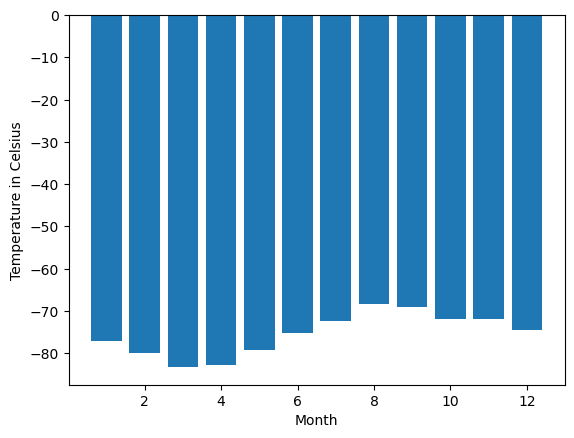

In [15]:
# Plot the average temperature by month
columns = mars_avg_low_temp_month.index
height = mars_avg_low_temp_month.values

plt.bar(x = columns, height = height)
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

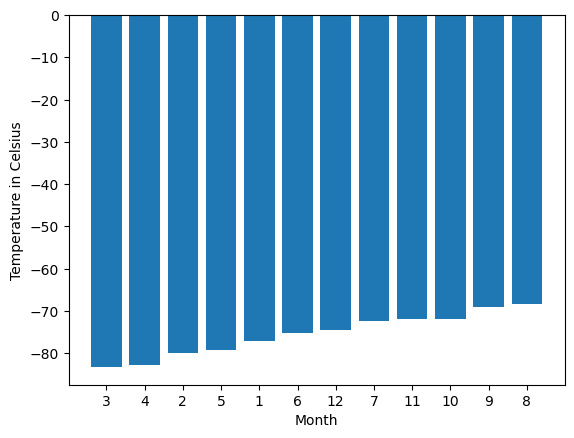

In [46]:
# Identify the coldest and hottest months in Curiosity's location
coldest_hottest_mars = mars_avg_low_temp_month.sort_values()

x = range(len(coldest_hottest_mars))
height = coldest_hottest_mars.values

plt.bar(x = x, height = height)

plt.xticks(x, coldest_hottest_mars.index)
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

plt.show()

In [17]:
# 4. Average pressure by Martian month
mars_mean_pressure_month = weather_data_df.groupby('month')['pressure'].mean()
mars_mean_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

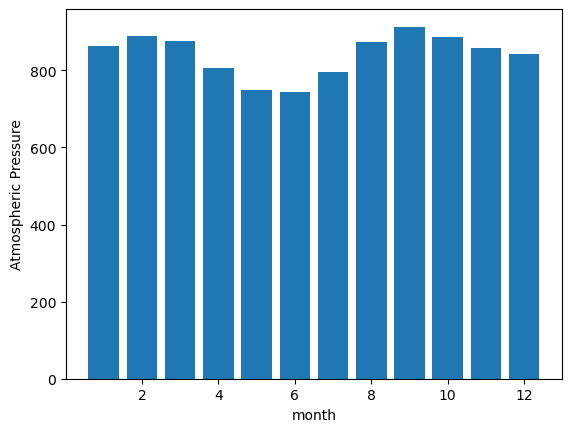

In [18]:
# Plot the average pressure by month
x = mars_mean_pressure_month.index
height = mars_mean_pressure_month.values

plt.bar(x = x, height = height)
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

C:\Users\eeels\AppData\Local\Temp\ipykernel_18680\2393369721.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrestrial_mars_year['terrestrial_days'] = (terrestrial_mars_year['terrestrial_date'] - pd.to_datetime('2012-08-16')).dt.days


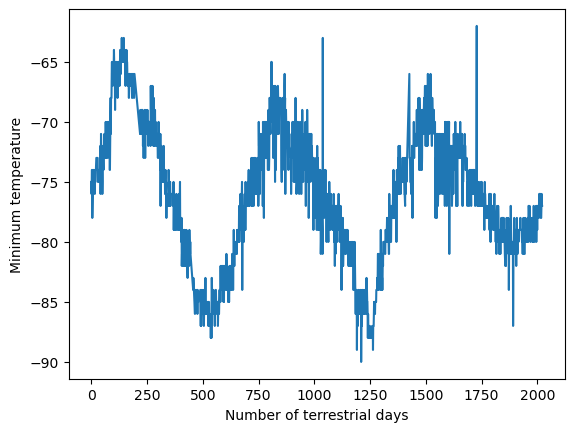

In [32]:
# 5. How many terrestrial (earth) days are there in a Martian year?
terrestrial_mars_year = weather_data_df[['terrestrial_date', 'min_temp']]
# select the first terrestrial day 2012-08-16 as the starting date, subtract it from each date in the
# column ['terrestrial_date'] then apply the date_time function dt.days so that it will count the days from the start
# date and the date in the row. Then take that number and add it back to the column ['terrestrial_days'], this 
# column will overwrite the original column of dates and save the number that that date is from the starter date.
terrestrial_mars_year['terrestrial_days'] = (terrestrial_mars_year['terrestrial_date'] - pd.to_datetime('2012-08-16')).dt.days

x = terrestrial_mars_year['terrestrial_days']
y = terrestrial_mars_year['min_temp']

plt.plot(x,y)
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
weather_data_df.to_csv('weather_data.csv')

In [34]:
browser.quit()